In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random, time
import cv2
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

### 版本3

In [2]:
dir_path = "C:/Users/iris168/DATA_MERGE _rename/"
img = cv2.imread(dir_path+'cells (1).jpg')
data= [np.array(img[:,:,0].reshape(-1),dtype = 'float32')]
for i in range (2,353):
    cell_img2_ = cv2.imread(dir_path+'cells ('+str(i)+').jpg')
    if (cell_img2_.shape == (50,50,3)):
        img2= np.array(cell_img2_[:,:,0].reshape(-1),dtype = 'float32')
        data_ = np.append(data, [img2], axis=0 )
        data = data_
    print(data.shape)

(2, 2500)
(3, 2500)
(4, 2500)
(5, 2500)
(6, 2500)
(7, 2500)
(8, 2500)
(9, 2500)
(10, 2500)
(11, 2500)
(12, 2500)
(13, 2500)
(14, 2500)
(15, 2500)
(16, 2500)
(16, 2500)
(17, 2500)
(18, 2500)
(19, 2500)
(20, 2500)
(21, 2500)
(22, 2500)
(23, 2500)
(24, 2500)
(25, 2500)
(26, 2500)
(27, 2500)
(28, 2500)
(28, 2500)
(29, 2500)
(30, 2500)
(31, 2500)
(32, 2500)
(33, 2500)
(34, 2500)
(35, 2500)
(36, 2500)
(37, 2500)
(38, 2500)
(39, 2500)
(40, 2500)
(41, 2500)
(42, 2500)
(43, 2500)
(44, 2500)
(45, 2500)
(46, 2500)
(47, 2500)
(48, 2500)
(49, 2500)
(50, 2500)
(51, 2500)
(52, 2500)
(53, 2500)
(54, 2500)
(55, 2500)
(56, 2500)
(57, 2500)
(58, 2500)
(59, 2500)
(60, 2500)
(61, 2500)
(62, 2500)
(63, 2500)
(64, 2500)
(65, 2500)
(66, 2500)
(67, 2500)
(68, 2500)
(69, 2500)
(70, 2500)
(71, 2500)
(72, 2500)
(73, 2500)
(74, 2500)
(75, 2500)
(76, 2500)
(77, 2500)
(78, 2500)
(79, 2500)
(80, 2500)
(81, 2500)
(82, 2500)
(82, 2500)
(83, 2500)
(84, 2500)
(85, 2500)
(86, 2500)
(87, 2500)
(88, 2500)
(89, 2500)
(90, 25

In [3]:
for i in range (0,100):
    print(data[min((round(i)%333),round((i+50)%333)):max((round(i)%333),round((i+50)%333))].shape)
    print(data[min((round(i)%333),round((i+50)%333)):max((round(i)%333),round((i+50)%333))])
    print(min((round(i)%333),round((i+50)%333)),max((round(i)%333),round((i+50)%333)))

(50, 2500)
[[122. 110. 120. ... 132. 119. 108.]
 [165. 184. 189. ... 181. 188. 197.]
 [234. 234. 232. ... 133. 133. 129.]
 ...
 [164. 211. 207. ... 212. 226. 221.]
 [131. 141. 134. ... 246. 241. 238.]
 [130. 158. 187. ... 100.  94.  99.]]
0 50
(50, 2500)
[[165. 184. 189. ... 181. 188. 197.]
 [234. 234. 232. ... 133. 133. 129.]
 [132. 131. 121. ... 109. 106. 100.]
 ...
 [131. 141. 134. ... 246. 241. 238.]
 [130. 158. 187. ... 100.  94.  99.]
 [148. 132. 108. ...  80.  82.  82.]]
1 51
(50, 2500)
[[234. 234. 232. ... 133. 133. 129.]
 [132. 131. 121. ... 109. 106. 100.]
 [194. 187. 178. ... 233. 231. 228.]
 ...
 [130. 158. 187. ... 100.  94.  99.]
 [148. 132. 108. ...  80.  82.  82.]
 [ 84.  80.  88. ... 143. 136. 150.]]
2 52
(50, 2500)
[[132. 131. 121. ... 109. 106. 100.]
 [194. 187. 178. ... 233. 231. 228.]
 [233. 236. 224. ... 243. 239. 235.]
 ...
 [148. 132. 108. ...  80.  82.  82.]
 [ 84.  80.  88. ... 143. 136. 150.]
 [112. 118. 118. ... 133. 154. 176.]]
3 53
(50, 2500)
[[194. 187. 1

In [4]:
data.shape

(333, 2500)

In [5]:
data

array([[122., 110., 120., ..., 132., 119., 108.],
       [165., 184., 189., ..., 181., 188., 197.],
       [234., 234., 232., ..., 133., 133., 129.],
       ...,
       [141., 146., 150., ..., 177., 180., 187.],
       [176., 178., 175., ..., 169., 146., 124.],
       [150., 153., 160., ..., 140., 135., 129.]], dtype=float32)

In [6]:
def weight_variable(shape, name):
    return tf.Variable(tf.truncated_normal(shape = shape, stddev = 0.1), name)
def bias_variable(shape, name):
    return tf.Variable(tf.constant(0.1, shape = shape), name)

In [7]:
x = tf.placeholder(tf.float32, shape = [None, 2500])
e_W_1 = weight_variable([2500, 1000], "e_W_1")
e_b_1 = bias_variable([1000], "e_b_1")
e_layer1 = tf.nn.relu(tf.matmul(x, e_W_1) + e_b_1)
e_W_2 = weight_variable([1000, 500], "e_W_2")
e_b_2 = bias_variable([500], "e_b_2")
e_layer2 = tf.nn.relu(tf.matmul(e_layer1, e_W_2) + e_b_2)
e_W_3 = weight_variable([500, 100], "e_W_3")
e_b_3 = bias_variable([100], "e_b_3")
e_layer3 = tf.nn.relu(tf.matmul(e_layer2, e_W_3) + e_b_3)
e_W_4 = weight_variable([100, 20], "e_W_3")
e_b_4 = bias_variable([20], "e_b_3")
code_layer = tf.nn.relu(tf.matmul(e_layer3, e_W_4) + e_b_4)
d_W_0 = weight_variable([20, 100], "d_W_1")
d_b_0 = bias_variable([100], "d_b_1")
d_layer0 = tf.nn.relu(tf.matmul(code_layer, d_W_0) + d_b_0)
d_W_1 = weight_variable([100, 500], "d_W_1")
d_b_1 = bias_variable([500], "d_b_1")
d_layer1 = tf.nn.relu(tf.matmul(d_layer0, d_W_1) + d_b_1)
d_W_2 = weight_variable([500, 1000], "d_W_2")
d_b_2 = bias_variable([1000], "d_b_2")
d_layer2 = tf.nn.relu(tf.matmul(d_layer1, d_W_2) + d_b_2)
d_W_3 = weight_variable([1000, 2500], "d_W_3")
d_b_3 = bias_variable([2500], "d_b_3")
output_layer = tf.nn.relu(tf.matmul(d_layer2, d_W_3) + d_b_3)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
w_list = [e_W_1,e_W_2,e_W_3,d_W_1,d_W_2,d_W_3,d_W_0,e_W_4]
org_loss = tf.reduce_mean(tf.pow(output_layer - x, 2))
regularizer = tf.reduce_sum([tf.reduce_sum(
                             tf.pow(w,2)/(1+tf.pow(w,2))) for w in w_list]) \
                            /tf.reduce_sum(
                             [tf.size(w,out_type=tf.float32) for w in w_list])
loss = org_loss+regularizer
optimizer = tf.train.RMSPropOptimizer(0.01).minimize(loss)
init_op = tf.global_variables_initializer()

In [9]:
n_split = 300
data_train, data_test = data[:n_split], data[n_split:]

In [10]:
sess = tf.InteractiveSession()
sess.run(init_op)
batch = data_train[min((round(i)%333),round((i+10)%333)):max((round(i)%333),round((i+10)%333))]
for i in range(30000):
    if i%100 == 0:
        print("step %d, loss %g"%(i, loss.eval(feed_dict={x:batch})))
    optimizer.run(feed_dict={x:batch})
    
print("final loss %g" % loss.eval(feed_dict={x:data_test}))

step 0, loss 65664.6
step 100, loss 15499
step 200, loss 14739.2
step 300, loss 13798.8
step 400, loss 13144.4
step 500, loss 12649.8
step 600, loss 12443.1
step 700, loss 12281.5
step 800, loss 12112
step 900, loss 11935.2
step 1000, loss 11803.2
step 1100, loss 11657.5
step 1200, loss 11559.2
step 1300, loss 11494.4
step 1400, loss 11328.8
step 1500, loss 11250.6
step 1600, loss 11126.8
step 1700, loss 11011.3
step 1800, loss 10910.9
step 1900, loss 10858
step 2000, loss 10771.2
step 2100, loss 10671.1
step 2200, loss 10561.8
step 2300, loss 10456.6
step 2400, loss 10414.1
step 2500, loss 10384.7
step 2600, loss 10366.5
step 2700, loss 10338.5
step 2800, loss 10279.6
step 2900, loss 10262.5
step 3000, loss 10184
step 3100, loss 10179
step 3200, loss 10113.1
step 3300, loss 10017.7
step 3400, loss 9995.99
step 3500, loss 9990.22
step 3600, loss 9963.59
step 3700, loss 9957.16
step 3800, loss 9923.45
step 3900, loss 9878.21
step 4000, loss 9820.46
step 4100, loss 9747.64
step 4200, los

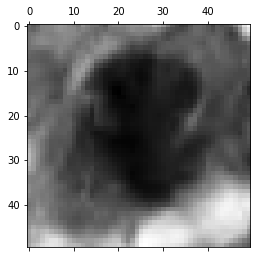

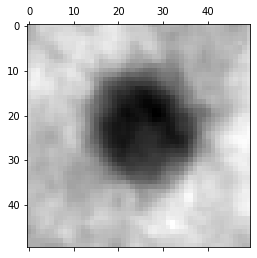

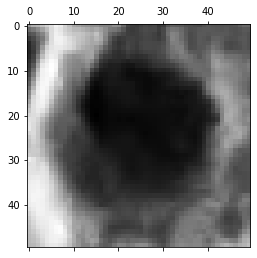

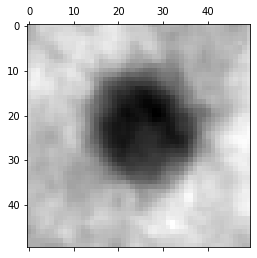

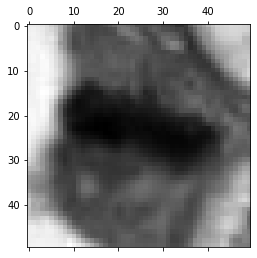

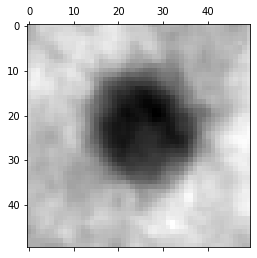

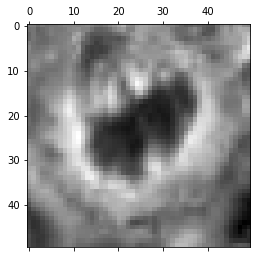

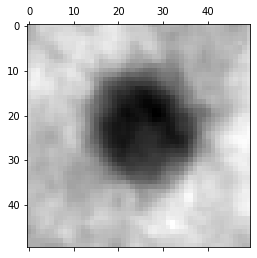

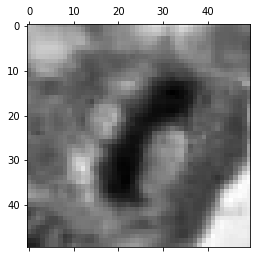

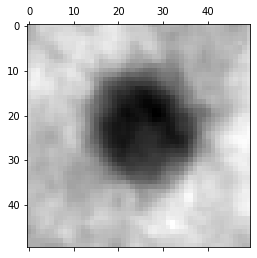

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_nd = output_layer.eval(feed_dict = {x:data[100:200]})
for i in [0, 1, 2, 3, 4]:
    curr_img = np.reshape(data[i, :], (50, 50)) 
    ae_img = np.reshape(output_nd[i,:], (50, 50))
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img, cmap=plt.get_cmap('gray'))

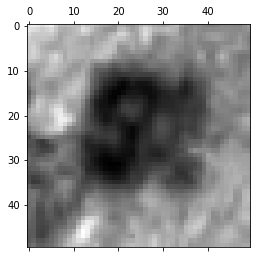

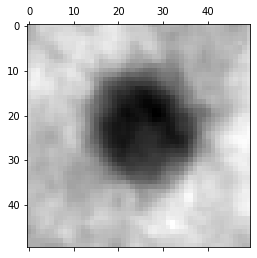

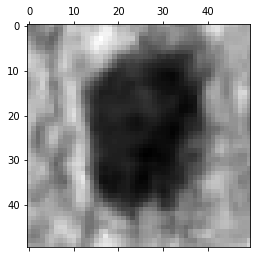

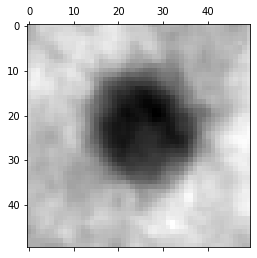

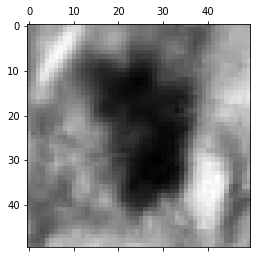

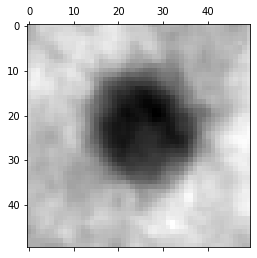

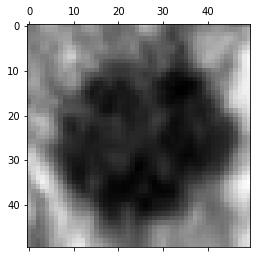

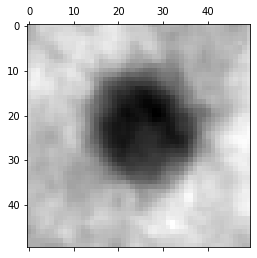

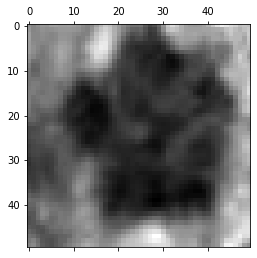

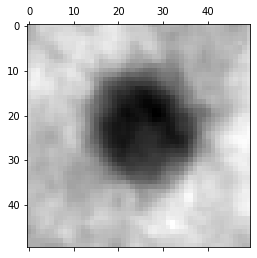

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

output_nd = output_layer.eval(feed_dict = {x:data_test})
for i in [0, 1, 2, 3, 4]:
    curr_img = np.reshape(data_test[i, :], (50, 50)) 
    ae_img = np.reshape(output_nd[i,:], (50, 50))
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.matshow(ae_img, cmap=plt.get_cmap('gray'))